In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

import env
import wrangle

from wrangle import wrangle_zillow
from wrangle import split


In [2]:
from scipy import stats
from math import sqrt


In [3]:
from wrangle import scale_data
from wrangle import seperate_y

In [4]:
df = wrangle_zillow()

In [5]:
df.head()

,square_feet,bedrooms,bathrooms,fips,lot_size,tax_value,house_age
parcelid,,,,,,,
12177905,2376.0,4,3,6037,13038.0,145143.0,51
12069064,738.0,2,1,6037,4214.0,218552.0,99
12790562,3039.0,4,3,6037,20028.0,220583.0,51
11104527,2540.0,4,3,6037,10384.0,430108.0,22
11830315,1146.0,2,1,6037,4657.0,273745.0,82


In [6]:
df.shape

(44134, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44134 entries, 12177905 to 13083743
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   square_feet  44134 non-null  float64
 1   bedrooms     44134 non-null  int64  
 2   bathrooms    44134 non-null  int64  
 3   fips         44134 non-null  int64  
 4   lot_size     44134 non-null  float64
 5   tax_value    44134 non-null  float64
 6   house_age    44134 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 2.7 MB


In [8]:
df.describe()

,square_feet,bedrooms,bathrooms,fips,lot_size,tax_value,house_age
count,44134.000000,44134.000000,44134.000000,44134.000000,44134.000000,4.413400e+04,44134.000000
mean,1660.511828,3.104862,2.087280,6044.832238,7567.313251,3.954958e+05,58.775389
std,619.006780,0.881571,0.778361,18.275731,3860.952216,2.897003e+05,22.692376
min,152.000000,1.000000,1.000000,6037.000000,236.000000,3.254000e+03,5.000000
25%,1204.000000,3.000000,2.000000,6037.000000,5442.250000,1.803428e+05,42.000000
50%,1534.000000,3.000000,2.000000,6037.000000,6708.500000,3.372200e+05,62.000000
75%,2019.000000,4.000000,3.000000,6037.000000,8374.750000,5.327890e+05,71.000000
max,3499.000000,9.000000,7.000000,6111.000000,23772.000000,1.679968e+06,143.000000


In [9]:
train, validate, test = split(df)

In [10]:
train.shape

(24714, 7)

In [11]:
validate.shape

(10593, 7)

In [12]:
test.shape

(8827, 7)

In [13]:
X_train, y_train, X_validate, y_validate, X_test, y_test = seperate_y(train, validate, test)

In [14]:
X_train.head()

,square_feet,bedrooms,bathrooms,fips,lot_size,house_age
parcelid,,,,,,
17149884,1913.0,4,2,6111,6418.0,39
17254400,1509.0,3,2,6111,7778.0,60
11183212,2202.0,4,3,6037,22099.0,32
14237595,1314.0,4,2,6059,6025.0,62
11270155,2130.0,3,3,6037,6927.0,33


In [15]:
y_train.head()

parcelid
17149884    479808.0
17254400    461938.0
11183212    211036.0
14237595     54850.0
11270155    277000.0
Name: tax_value, dtype: float64

In [16]:
train_scaled, validate_scaled, test_scaled = scale_data(X_train, X_validate, X_test)

In [17]:
train_scaled.head()

,square_feet,bedrooms,bathrooms,fips,lot_size,house_age
0,0.526143,0.375,0.166667,1.000000,0.262661,0.259542
1,0.405438,0.250,0.166667,1.000000,0.320445,0.419847
2,0.612489,0.375,0.333333,0.000000,0.928917,0.206107
3,0.347177,0.375,0.166667,0.297297,0.245964,0.435115
4,0.590977,0.250,0.333333,0.000000,0.284288,0.213740


(array([ 251., 1582., 1582., 1179., 1238., 1253., 1343., 1381., 1295.,
        1287., 1257., 1197., 1171., 1073.,  906.,  721.,  753.,  604.,
         564.,  496.,  423.,  376.,  314.,  316.,  248.,  237.,  190.,
         174.,  168.,  113.,  112.,   91.,   91.,   72.,   85.,   64.,
          67.,   45.,   41.,   47.,   55.,   39.,   35.,   30.,   28.,
          30.,   27.,   27.,   17.,   19.]),
 array([   3254.  ,   36788.28,   70322.56,  103856.84,  137391.12,
         170925.4 ,  204459.68,  237993.96,  271528.24,  305062.52,
         338596.8 ,  372131.08,  405665.36,  439199.64,  472733.92,
         506268.2 ,  539802.48,  573336.76,  606871.04,  640405.32,
         673939.6 ,  707473.88,  741008.16,  774542.44,  808076.72,
         841611.  ,  875145.28,  908679.56,  942213.84,  975748.12,
        1009282.4 , 1042816.68, 1076350.96, 1109885.24, 1143419.52,
        1176953.8 , 1210488.08, 1244022.36, 1277556.64, 1311090.92,
        1344625.2 , 1378159.48, 1411693.76, 1445228.04, 

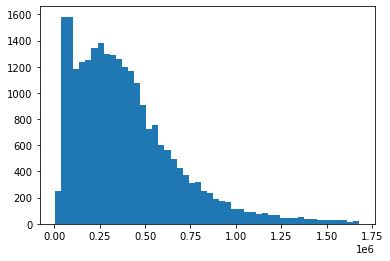

In [18]:
plt.hist(y_train, bins = 50)

In [19]:
list(train.columns)

['square_feet',
 'bedrooms',
 'bathrooms',
 'fips',
 'lot_size',
 'tax_value',
 'house_age']

array([[<AxesSubplot:title={'center':'square_feet'}>,
        <AxesSubplot:title={'center':'bedrooms'}>,
        <AxesSubplot:title={'center':'bathrooms'}>],
       [<AxesSubplot:title={'center':'fips'}>,
        <AxesSubplot:title={'center':'lot_size'}>,
        <AxesSubplot:title={'center':'tax_value'}>],
       [<AxesSubplot:title={'center':'house_age'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

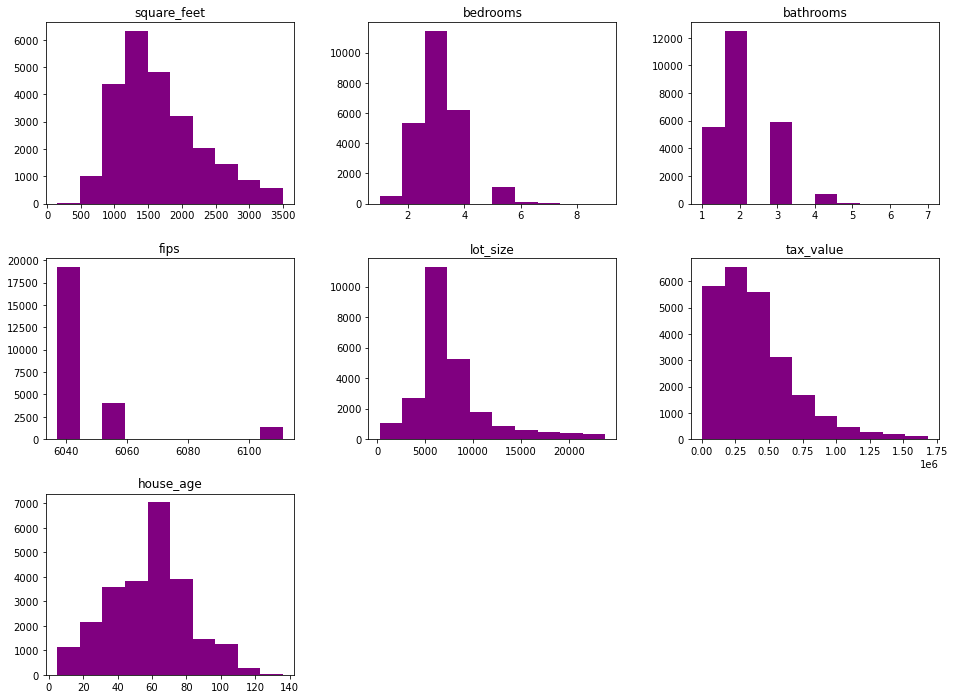

In [20]:
train.hist(grid=False, figsize=(16,12), color='purple')

In [21]:
## takeaways

### most variables appear to have normal distribution

### county may not be a good indicator 

### tax value may still be suffering from outliers 

<AxesSubplot:>

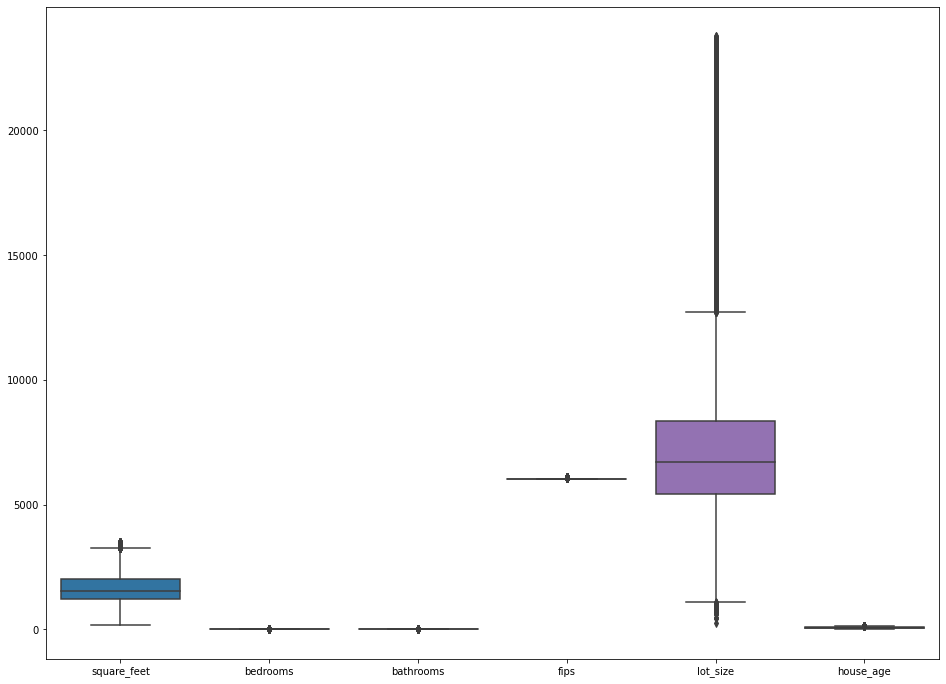

In [22]:
plt.figure(figsize=(16,12))
sns.boxplot(data = train.drop(columns = 'tax_value'))

In [23]:
# .corr() is linear correlation coefficient
corr = train.corr()

corr

,square_feet,bedrooms,bathrooms,fips,lot_size,tax_value,house_age
square_feet,1.000000,0.644416,0.730934,0.122642,0.226083,0.452796,-0.410013
bedrooms,0.644416,1.000000,0.533980,0.124330,0.060103,0.184309,-0.272413
bathrooms,0.730934,0.533980,1.000000,0.032592,0.222208,0.367125,-0.507715
fips,0.122642,0.124330,0.032592,1.000000,-0.094011,0.068022,-0.232239
lot_size,0.226083,0.060103,0.222208,-0.094011,1.000000,0.106721,-0.127406
tax_value,0.452796,0.184309,0.367125,0.068022,0.106721,1.000000,-0.157974
house_age,-0.410013,-0.272413,-0.507715,-0.232239,-0.127406,-0.157974,1.000000


<AxesSubplot:>

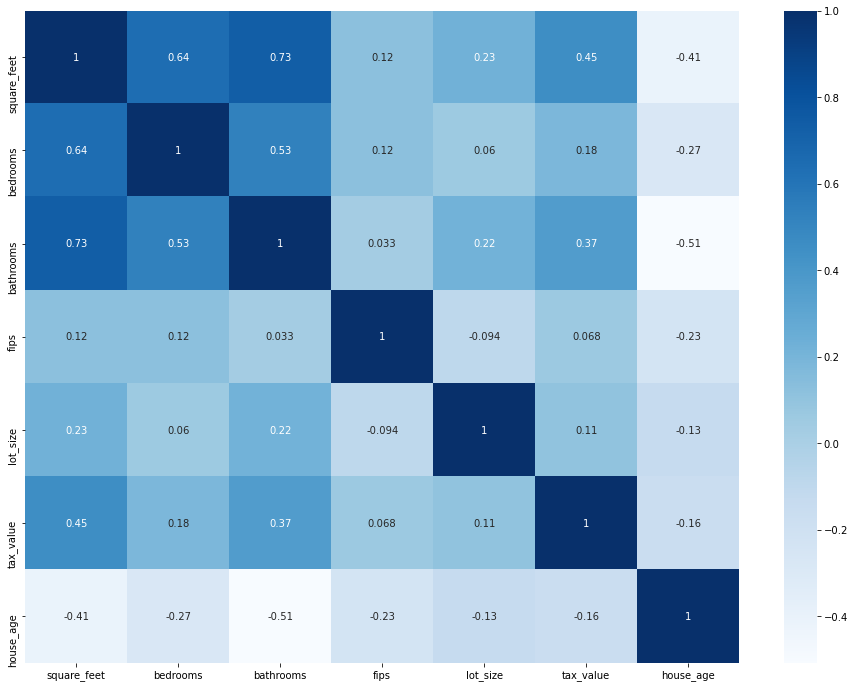

In [24]:
plt.figure(figsize=(16,12))
sns.heatmap(train.corr(), cmap='Blues', annot=True)

In [25]:
## bedrooms and bathrooms are strongly correlated, they may not both be necessary 

## taxes and tax amount are very strongly correlated

## fips does not appear to have a very strong correlation

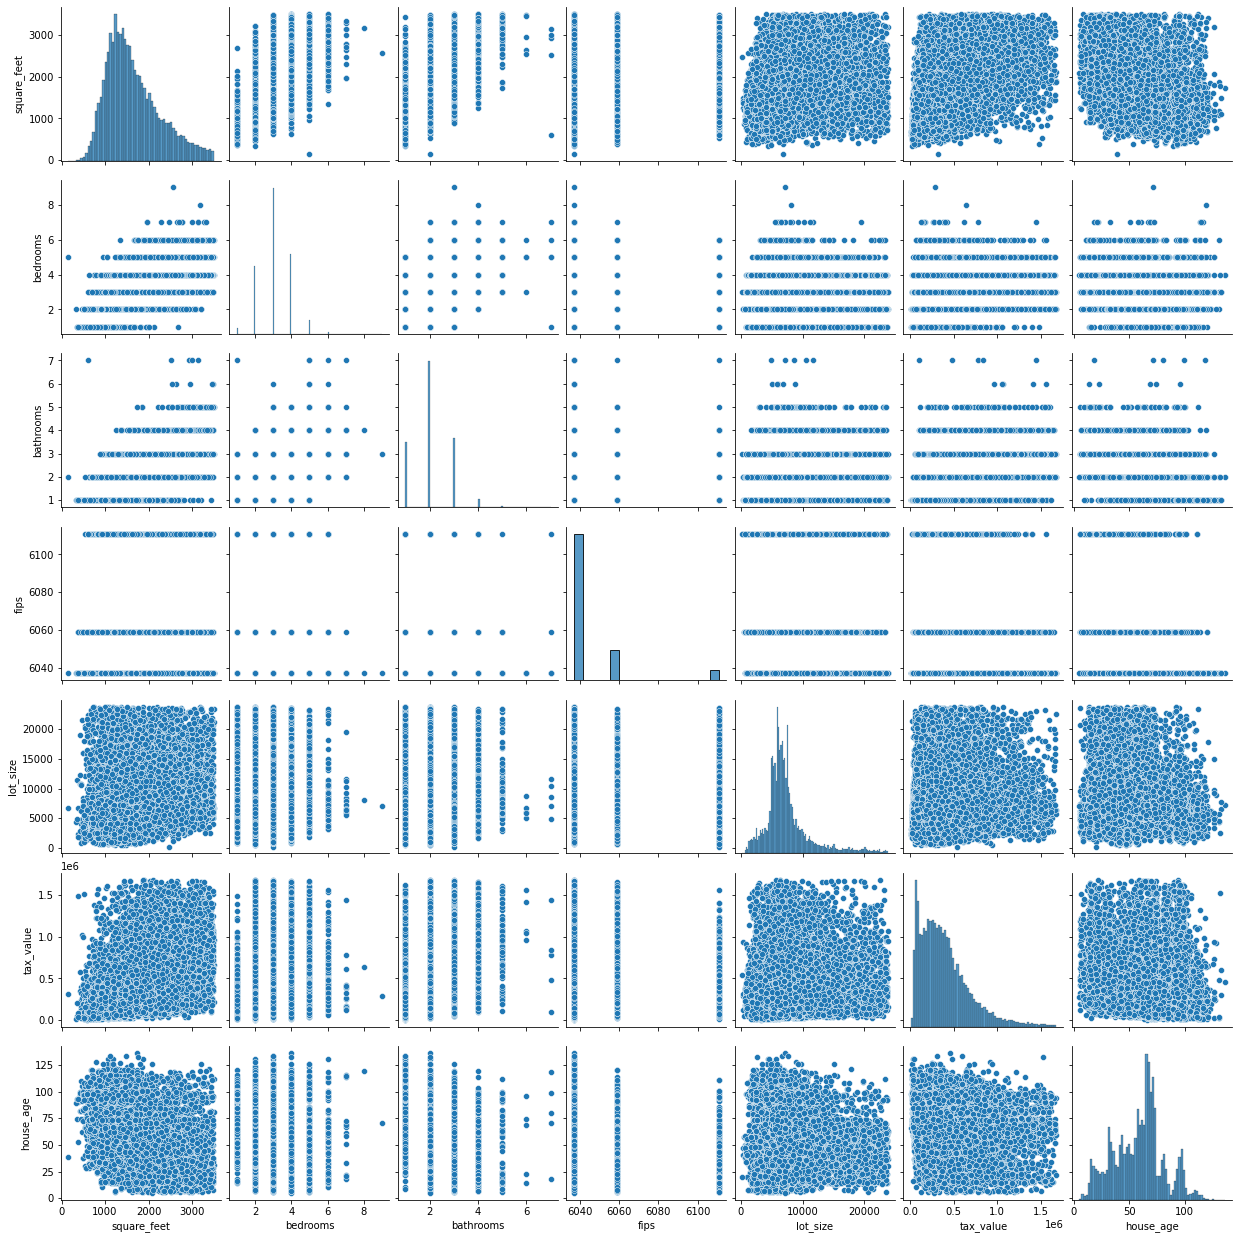

In [26]:
sns.pairplot(data = train)

In [27]:
def plot_variable_pairs_regline(train, hue=None):
    '''
    This function takes in a df and default hue=None and displays a pairplot
    with a red regression line.
    '''
    plot_kws={'line_kws':{'color':'red'}, 
              'scatter_kws': {'alpha': 0.7}}
    sns.pairplot(train, hue=hue, kind="reg", plot_kws={'line_kws':{'color':'red'}, 
                                                    'scatter_kws': {'alpha': 0.1}})

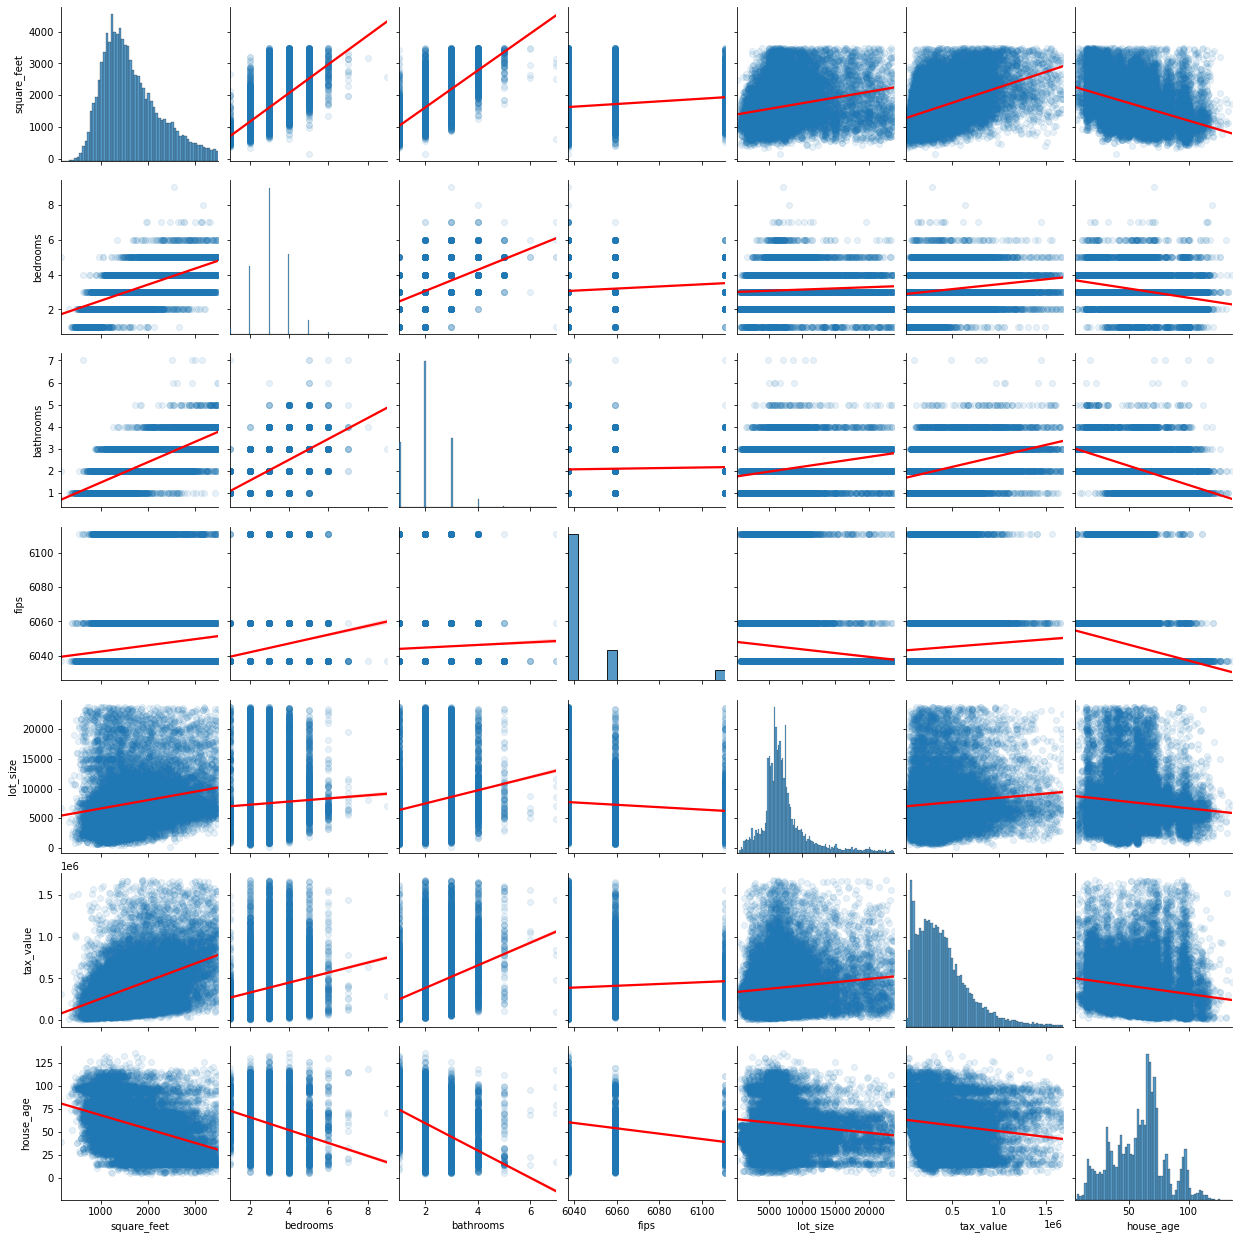

In [28]:
plot_variable_pairs_regline(train)

In [29]:
def correlation_exploration(train, x_string, y_string):
    '''
    This function takes in a df, a string for an x-axis variable in the df, 
    and a string for a y-axis variable in the df and displays a scatter plot, the r-
    squared value, and the p-value. It explores the correlation between input the x 
    and y variables.
    '''
    r, p = stats.pearsonr(train[x_string], train[y_string])
    df.plot.scatter(x_string, y_string)
    plt.title(f"{x_string}'s Relationship with {y_string}")
    print(f'The p-value is: {p}. There is {round(p,3)}% chance that we see these results by chance.')
    print(f'r = {round(r, 2)}')
    plt.show()

The p-value is: 0.0. There is 0.0% chance that we see these results by chance.
r = 0.53


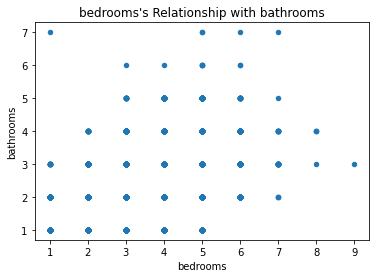

In [30]:
correlation_exploration(train, 'bedrooms', 'bathrooms')

In [31]:
import explore

In [32]:
list(train.columns)

['square_feet',
 'bedrooms',
 'bathrooms',
 'fips',
 'lot_size',
 'tax_value',
 'house_age']

In [33]:
target = ['tax_value']

cat_vars = ['bedrooms', 'bathrooms', 'fips', 'house_age']

quant_vars = ['square_feet', 'lot_size', 'tax_value']

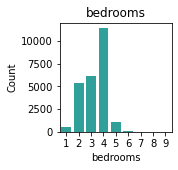

   bedrooms  Count  Percent
3         4  11426    46.23
4         3   6204    25.10
2         2   5330    21.57
5         5   1110     4.49
1         1    493     1.99
6         6    135     0.55
7         7     14     0.06
9         9      1     0.00
8         8      1     0.00
_________________________________________________________________


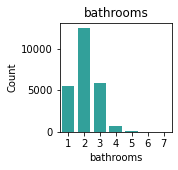

   bathrooms  Count  Percent
2          2  12483    50.51
3          3   5927    23.98
1          1   5536    22.40
4          4    675     2.73
5          5     83     0.34
7          7      5     0.02
6          6      5     0.02
_________________________________________________________________


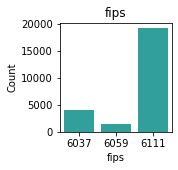

      fips  Count  Percent
6037  6111  19276    78.00
6059  6037   4038    16.34
6111  6059   1400     5.66
_________________________________________________________________


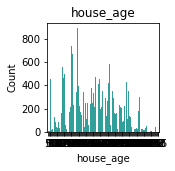

     house_age  Count  Percent
66          39    889     3.60
71          60    841     3.40
67          32    739     2.99
68          62    728     2.95
65          33    672     2.72
..         ...    ...      ...
128        136      1     0.00
5          125      1     0.00
124        128      1     0.00
125        132      1     0.00
127          5      1     0.00

[127 rows x 3 columns]
_________________________________________________________________


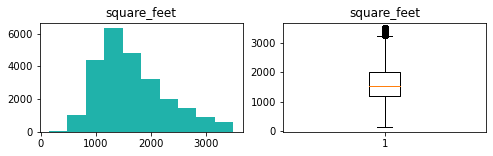

count    24714.00000
mean      1656.65647
std        619.41270
min        152.00000
25%       1200.00000
50%       1527.50000
75%       2018.00000
max       3499.00000
Name: square_feet, dtype: float64


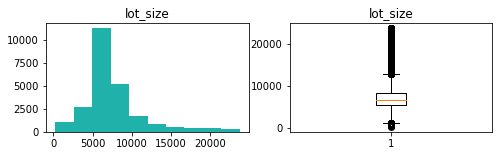

count    24714.000000
mean      7567.679453
std       3877.534776
min        236.000000
25%       5439.250000
50%       6688.500000
75%       8347.750000
max      23772.000000
Name: lot_size, dtype: float64


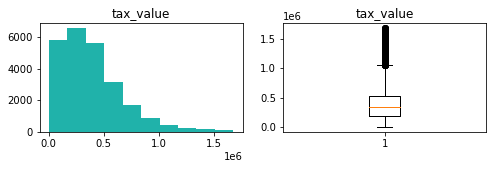

count    2.471400e+04
mean     3.941615e+05
std      2.872081e+05
min      3.254000e+03
25%      1.802040e+05
50%      3.380000e+05
75%      5.310542e+05
max      1.679968e+06
Name: tax_value, dtype: float64


In [34]:
explore.explore_univariate(train, cat_vars, quant_vars)

In [35]:
## most houses have 4 bedrooms, 2 baths

## majority of houses in county 3101

# T Test

In [36]:
H0 = 'There is no difference in tax value between homes with 2 bedrooms and the general population'

H1 = 'There is a difference in the tax value between homes with 2 bedrooms and the general population'

alpha = .05

In [37]:
two_rooms = df[df.bedrooms == 2]



In [38]:
two_rooms.head()

,square_feet,bedrooms,bathrooms,fips,lot_size,tax_value,house_age
parcelid,,,,,,,
12069064,738.0,2,1,6037,4214.0,218552.0,99
11830315,1146.0,2,1,6037,4657.0,273745.0,82
11706737,1316.0,2,1,6037,5091.0,171838.0,113
11737342,1529.0,2,2,6037,3640.0,657099.0,93
12105191,829.0,2,2,6037,16378.0,276147.0,30


In [39]:
μ = df.tax_value.mean()

μ 

395495.7765894775

In [40]:
xbar = two_rooms.tax_value.mean()

xbar

340752.0309127109

In [41]:
s = two_rooms.tax_value.std()

s

257756.2941293764

In [42]:
n = two_rooms.shape[0]

n

9543

In [43]:
degf = n - 1

degf

9542

In [44]:
standard_error = s / sqrt(n)

standard_error

2638.5590451174003

In [45]:
t = (xbar - μ) / (s / sqrt(n))
t

-20.747591674353014

In [46]:
p = stats.t(degf).sf(t) * 2
p

2.0

In [47]:
print(f't = {t:.5f}')
print(f'p = {p:.5f}')

if p < alpha:
    print(H1)
else:
    print(H0)

t = -20.74759
p = 2.00000
There is no difference in tax value between homes with 2 bedrooms and the general population


In [48]:
H0 = 'There is no difference in tax value between homes in county 3101 and the general population'

H1 = 'There is a difference in the tax value between homes in county 3101 and the general population'

alpha = .05

In [49]:
fips_6037 = df[df.fips == 6037]

μ = df.tax_value.mean()
xbar = fips_6037.tax_value.mean()
s = fips_6037.tax_value.std()
n = fips_6037.shape[0]
degf = n - 1
standard_error = s / sqrt(n)

t = (xbar - μ) / (s / sqrt(n))
t

-11.182896424080731

In [50]:
p = stats.t(degf).sf(t) * 2

print(f't = {t:.5f}')
print(f'p = {p:.5f}')

if p < alpha:
    print(H1)
else:
    print(H0)

t = -11.18290
p = 2.00000
There is no difference in tax value between homes in county 3101 and the general population


# Correlation

In [51]:
H0 = 'There is no correlation between square feet and tax value'

H1 = 'There is a correlation between square feet and tax value'

alpha = .05

In [52]:
r, p = stats.pearsonr(df.square_feet, df.tax_value)
print(f'r = {r:.5f}')
print(f'p = {p:.1f}')

if p < alpha:
    print(H1)
else:
    print(H0)

r = 0.44738
p = 0.0
There is a correlation between square feet and tax value


In [53]:
H0 = 'There is no correlation between lot size and tax value'

H1 = 'There is a correlation between lot size and tax value'

alpha = .05

In [54]:
r, p = stats.pearsonr(df.lot_size, df.tax_value)
print(f'r = {r:.5f}')
print(f'p = {p:.1f}')

if p < alpha:
    print(H1)
else:
    print(H0)

r = 0.11010
p = 0.0
There is a correlation between lot size and tax value
